In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [2]:
# Cargar datos de divorcios

df_div = pd.read_csv('div_full.csv')
print(f"Shape divorcios: {df_div.shape}")
print(f"Columnas: {df_div.columns.tolist()}")
print()

# Cargar datos de matrimonios

df_mat = pd.read_csv('mat_full.csv')
print(f"Shape matrimonios: {df_mat.shape}")
print(f"Columnas: {df_mat.columns.tolist()}")

Shape divorcios: (56349, 12)
Columnas: ['AÑOREG', 'DEPOCU', 'DEPREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ', 'MESOCU', 'MESREG', 'MUPOCU', 'MUPREG', 'NACHOM', 'NACMUJ']

Shape matrimonios: (752264, 15)
Columnas: ['AÑOREG', 'CLAUNI', 'DEPOCU', 'DEPREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOM', 'ESCMUJ', 'MESOCU', 'MESREG', 'MUPOCU', 'MUPREG', 'NACHOM', 'NACMUJ']


In [3]:
# Convertir columnas numéricas (edades, años, días)

# Columnas numéricas en ambos datasets
columnas_numericas_div = ['AÑOREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ']
columnas_numericas_mat = ['AÑOREG', 'DIAOCU', 'EDADHOM', 'EDADMUJ']

print("Convirtiendo columnas numéricas - DIVORCIOS")
for col in columnas_numericas_div:
    if col in df_div.columns:
        df_div[col] = pd.to_numeric(df_div[col], errors='coerce')
        validos = df_div[col].notna().sum()
        print(f"  {col}: {validos}/{len(df_div)} válidos ({validos/len(df_div)*100:.1f}%)")

print("\nConvirtiendo columnas numéricas - MATRIMONIOS")
for col in columnas_numericas_mat:
    if col in df_mat.columns:
        df_mat[col] = pd.to_numeric(df_mat[col], errors='coerce')
        validos = df_mat[col].notna().sum()
        print(f"  {col}: {validos}/{len(df_mat)} válidos ({validos/len(df_mat)*100:.1f}%)")


Convirtiendo columnas numéricas - DIVORCIOS
  AÑOREG: 56349/56349 válidos (100.0%)
  DIAOCU: 56349/56349 válidos (100.0%)
  EDADHOM: 25467/56349 válidos (45.2%)
  EDADMUJ: 25584/56349 válidos (45.4%)

Convirtiendo columnas numéricas - MATRIMONIOS
  AÑOREG: 752264/752264 válidos (100.0%)
  DIAOCU: 752264/752264 válidos (100.0%)
  EDADHOM: 751969/752264 válidos (100.0%)
  EDADMUJ: 751931/752264 válidos (100.0%)


In [5]:
#Limpieza de nombres de departamentos

mapeo_departamentos = {
    'Guatemala': 'Guatemala',
    'Quetzaltenango': 'Quetzaltenango',
    'Escuintla': 'Escuintla',
    'Jutiapa': 'Jutiapa',
    'San Marcos': 'San Marcos',
    'Izabal': 'Izabal',
    'Huehuetenango': 'Huehuetenango',
    'Suchitepequez': 'Suchitepéquez',
    'Suchitepéquez': 'Suchitepéquez',
    'Retalhuleu': 'Retalhuleu',
    'Zacapa': 'Zacapa',
    'Santa Rosa': 'Santa Rosa',
    'Chiquimula': 'Chiquimula',
    'Alta Verapaz': 'Alta Verapaz',
    'Jalapa': 'Jalapa',
    'Peten': 'Petén',
    'Petén': 'Petén',
    'Quiche': 'Quiché',
    'Quiché': 'Quiché',
    'Chimaltenango': 'Chimaltenango',
    'Sacatepequez': 'Sacatepéquez',
    'Sacatepéquez': 'Sacatepéquez',
    'Baja Verapaz': 'Baja Verapaz',
    'El Progreso': 'El Progreso',
    'Totonicapan': 'Totonicapán',
    'Totonicapán': 'Totonicapán',
    'Solola': 'Sololá',
    'Sololá': 'Sololá'
}

In [6]:
# Aplicar a divorcios
print("LIMPIEZA DE DEPARTAMENTOS - DIVORCIOS")
print("Valores únicos antes:")
print(df_div['DEPREG'].unique())

df_div['DEPREG_LIMPIO'] = df_div['DEPREG'].map(mapeo_departamentos).fillna(df_div['DEPREG'])

print("\nValores únicos después:")
print(df_div['DEPREG_LIMPIO'].unique())

# Identificar valores no oficiales (como "Ignorado" o "No especificado")
oficiales = set(mapeo_departamentos.values())
no_oficiales_div = set(df_div['DEPREG_LIMPIO'].unique()) - oficiales
print(f"\nValores no oficiales en divorcios: {no_oficiales_div}")

LIMPIEZA DE DEPARTAMENTOS - DIVORCIOS
Valores únicos antes:
<StringArray>
['Quetzaltenango',      'Guatemala',         'Izabal',         'Jalapa',
   'Sacatepequez',        'Jutiapa',     'Santa Rosa',   'Baja Verapaz',
  'Chimaltenango',  'Suchitepequez',  'Huehuetenango',         'Zacapa',
     'San Marcos',   'Alta Verapaz',     'Retalhuleu',      'Escuintla',
         'Quiche',    'El Progreso',     'Chiquimula',          'Peten',
    'Totonicapan',         'Solola',         'Sololá',    'Totonicapán',
         'Quiché',          'Petén',   'Sacatepéquez',  'Suchitepéquez']
Length: 28, dtype: str

Valores únicos después:
<StringArray>
['Quetzaltenango',      'Guatemala',         'Izabal',         'Jalapa',
   'Sacatepéquez',        'Jutiapa',     'Santa Rosa',   'Baja Verapaz',
  'Chimaltenango',  'Suchitepéquez',  'Huehuetenango',         'Zacapa',
     'San Marcos',   'Alta Verapaz',     'Retalhuleu',      'Escuintla',
         'Quiché',    'El Progreso',     'Chiquimula',       

In [7]:
# Aplicar a matrimonios
print("\n" + "="*60)
print("LIMPIEZA DE DEPARTAMENTOS - MATRIMONIOS")
print("Valores únicos antes:")
print(df_mat['DEPREG'].unique())

df_mat['DEPREG_LIMPIO'] = df_mat['DEPREG'].map(mapeo_departamentos).fillna(df_mat['DEPREG'])

print("\nValores únicos después:")
print(df_mat['DEPREG_LIMPIO'].unique())

no_oficiales_mat = set(df_mat['DEPREG_LIMPIO'].unique()) - oficiales
print(f"\nValores no oficiales en matrimonios: {no_oficiales_mat}")


LIMPIEZA DE DEPARTAMENTOS - MATRIMONIOS
Valores únicos antes:
<StringArray>
[     'Guatemala',    'Totonicapan',     'Santa Rosa',      'Escuintla',
  'Suchitepequez',   'Sacatepequez',         'Izabal',     'Retalhuleu',
        'Jutiapa', 'Quetzaltenango',   'Alta Verapaz',  'Huehuetenango',
     'San Marcos',     'Chiquimula',    'El Progreso',          'Peten',
  'Chimaltenango',         'Jalapa',         'Zacapa',   'Baja Verapaz',
         'Solola',         'Quiche',   'Sacatepéquez',          'Petén',
  'Suchitepéquez',    'Totonicapán',         'Quiché',         'Sololá']
Length: 28, dtype: str

Valores únicos después:
<StringArray>
[     'Guatemala',    'Totonicapán',     'Santa Rosa',      'Escuintla',
  'Suchitepéquez',   'Sacatepéquez',         'Izabal',     'Retalhuleu',
        'Jutiapa', 'Quetzaltenango',   'Alta Verapaz',  'Huehuetenango',
     'San Marcos',     'Chiquimula',    'El Progreso',          'Petén',
  'Chimaltenango',         'Jalapa',         'Zacapa',   '

In [8]:
# Limpieza de meses (crear columna numérica)

# Mapeo de meses a número
meses_map = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

In [9]:
# Divorcios
df_div['MES_NUM'] = df_div['MESOCU'].map(meses_map)
print("DIVORCIOS - Valores nulos en MES_NUM:", df_div['MES_NUM'].isna().sum())
# Eliminar filas con mes nulo (si son pocas)
df_div = df_div.dropna(subset=['MES_NUM'])
print(f"Shape divorcios después de limpiar meses: {df_div.shape}")

DIVORCIOS - Valores nulos en MES_NUM: 0
Shape divorcios después de limpiar meses: (56349, 14)


In [10]:
# Matrimonios
df_mat['MES_NUM'] = df_mat['MESOCU'].map(meses_map)
print("\nMATRIMONIOS - Valores nulos en MES_NUM:", df_mat['MES_NUM'].isna().sum())
df_mat = df_mat.dropna(subset=['MES_NUM'])
print(f"Shape matrimonios después de limpiar meses: {df_mat.shape}")


MATRIMONIOS - Valores nulos en MES_NUM: 0
Shape matrimonios después de limpiar meses: (752264, 17)


In [11]:
# Excluir valores no oficiales en departamentos

# Para el análisis geográfico, excluimos registros con departamentos no oficiales
# (como "Ignorado", "No especificado", etc.)

print("DIVORCIOS - Registros con departamento no oficial:")
if no_oficiales_div:
    mask_div = df_div['DEPREG_LIMPIO'].isin(no_oficiales_div)
    print(f"  {mask_div.sum()} registros ({mask_div.sum()/len(df_div)*100:.2f}%)")
    df_div = df_div[~mask_div]
    print(f"  Shape después de excluir: {df_div.shape}")
else:
    print("  No hay valores no oficiales en divorcios")

print("\nMATRIMONIOS - Registros con departamento no oficial:")
if no_oficiales_mat:
    mask_mat = df_mat['DEPREG_LIMPIO'].isin(no_oficiales_mat)
    print(f"  {mask_mat.sum()} registros ({mask_mat.sum()/len(df_mat)*100:.2f}%)")
    df_mat = df_mat[~mask_mat]
    print(f"  Shape después de excluir: {df_mat.shape}")
else:
    print("  No hay valores no oficiales en matrimonios")


DIVORCIOS - Registros con departamento no oficial:
  No hay valores no oficiales en divorcios

MATRIMONIOS - Registros con departamento no oficial:
  No hay valores no oficiales en matrimonios


In [12]:
# Agregación por departamento

# Función para calcular proporciones mensuales

def calc_prop_meses(grupo):
    """Calcula la proporción de divorcios/matrimonios en cada mes (1-12)"""
    total = len(grupo)
    if total == 0:
        return pd.Series([0]*12, index=[f'prop_mes_{i}' for i in range(1,13)])
    conteo = grupo['MES_NUM'].value_counts().reindex(range(1,13), fill_value=0)
    prop = conteo / total
    prop.index = [f'prop_mes_{i}' for i in range(1,13)]
    return prop

In [13]:
# Agregación para divorcios

print("AGREGACIÓN POR DEPARTAMENTO - DIVORCIOS")

df_div_agrup = df_div.groupby('DEPREG_LIMPIO').agg(
    total_divorcios=('DEPREG_LIMPIO', 'count'),
    edad_hom_media=('EDADHOM', 'mean'),
    edad_muj_media=('EDADMUJ', 'mean'),
    edad_hom_std=('EDADHOM', 'std'),
    edad_muj_std=('EDADMUJ', 'std')
).reset_index()

# Añadir proporciones mensuales
prop_meses_div = df_div.groupby('DEPREG_LIMPIO').apply(calc_prop_meses).reset_index()
df_div_agrup = df_div_agrup.merge(prop_meses_div, on='DEPREG_LIMPIO', how='left')

print(f"Shape: {df_div_agrup.shape}")
print(f"Departamentos: {len(df_div_agrup)}")

AGREGACIÓN POR DEPARTAMENTO - DIVORCIOS
Shape: (22, 18)
Departamentos: 22


In [14]:
# Agregación para matrimonios

print("AGREGACIÓN POR DEPARTAMENTO - MATRIMONIOS")

df_mat_agrup = df_mat.groupby('DEPREG_LIMPIO').agg(
    total_matrimonios=('DEPREG_LIMPIO', 'count'),
    edad_hom_media=('EDADHOM', 'mean'),
    edad_muj_media=('EDADMUJ', 'mean'),
    edad_hom_std=('EDADHOM', 'std'),
    edad_muj_std=('EDADMUJ', 'std')
).reset_index()

# Añadir proporciones mensuales
prop_meses_mat = df_mat.groupby('DEPREG_LIMPIO').apply(calc_prop_meses).reset_index()
df_mat_agrup = df_mat_agrup.merge(prop_meses_mat, on='DEPREG_LIMPIO', how='left')

print(f"Shape: {df_mat_agrup.shape}")
print(f"Departamentos: {len(df_mat_agrup)}")
df_mat_agrup.head()


AGREGACIÓN POR DEPARTAMENTO - MATRIMONIOS
Shape: (22, 18)
Departamentos: 22


,DEPREG_LIMPIO,total_matrimonios,edad_hom_media,edad_muj_media,edad_hom_std,edad_muj_std,prop_mes_1,prop_mes_2,prop_mes_3,prop_mes_4,prop_mes_5,prop_mes_6,prop_mes_7,prop_mes_8,prop_mes_9,prop_mes_10,prop_mes_11,prop_mes_12
0,Alta Verapaz,52734,28.142513,24.485290,10.028015,8.763155,0.085960,0.093735,0.091080,0.071567,0.065518,0.057610,0.065328,0.071282,0.067869,0.097470,0.110650,0.121933
1,Baja Verapaz,13953,27.596344,24.323582,10.724838,9.412807,0.085788,0.084426,0.089586,0.079983,0.073604,0.068444,0.074106,0.084498,0.061492,0.081918,0.096252,0.119903
2,Chimaltenango,38338,26.520286,24.255492,8.903786,7.695151,0.084120,0.089598,0.087850,0.088502,0.077625,0.068287,0.071496,0.079008,0.064949,0.081799,0.104518,0.102248
3,Chiquimula,16418,29.699062,26.190203,11.177047,9.620567,0.086917,0.095931,0.098246,0.088074,0.072421,0.064320,0.065416,0.072421,0.057863,0.071141,0.105616,0.121635
4,El Progreso,8476,31.374366,27.559188,12.041293,10.404068,0.079873,0.094148,0.088603,0.070316,0.073620,0.066777,0.076923,0.076451,0.079047,0.080345,0.098749,0.115149


In [16]:
# Manejo de valores nulos en edades

# Para divorcios, rellenar medias nulas con media nacional
media_global_div_hom = df_div['EDADHOM'].mean()
media_global_div_muj = df_div['EDADMUJ'].mean()
std_global_div_hom = df_div['EDADHOM'].std()
std_global_div_muj = df_div['EDADMUJ'].std()

df_div_agrup['edad_hom_media'] = df_div_agrup['edad_hom_media'].fillna(media_global_div_hom)
df_div_agrup['edad_muj_media'] = df_div_agrup['edad_muj_media'].fillna(media_global_div_muj)
df_div_agrup['edad_hom_std'] = df_div_agrup['edad_hom_std'].fillna(std_global_div_hom)
df_div_agrup['edad_muj_std'] = df_div_agrup['edad_muj_std'].fillna(std_global_div_muj)

# Para matrimonios
media_global_mat_hom = df_mat['EDADHOM'].mean()
media_global_mat_muj = df_mat['EDADMUJ'].mean()
std_global_mat_hom = df_mat['EDADHOM'].std()
std_global_mat_muj = df_mat['EDADMUJ'].std()

df_mat_agrup['edad_hom_media'] = df_mat_agrup['edad_hom_media'].fillna(media_global_mat_hom)
df_mat_agrup['edad_muj_media'] = df_mat_agrup['edad_muj_media'].fillna(media_global_mat_muj)
df_mat_agrup['edad_hom_std'] = df_mat_agrup['edad_hom_std'].fillna(std_global_mat_hom)
df_mat_agrup['edad_muj_std'] = df_mat_agrup['edad_muj_std'].fillna(std_global_mat_muj)

print("Valores nulos después de rellenar:")
print("Divorcios:", df_div_agrup.isna().sum().sum())
print("Matrimonios:", df_mat_agrup.isna().sum().sum())


Valores nulos después de rellenar:
Divorcios: 0
Matrimonios: 0


In [17]:
# Combinar dataframes para análisis comparativos

# Unir los dataframes por departamento para tener divorcios y matrimonios juntos
df_combinado = pd.merge(
    df_div_agrup, 
    df_mat_agrup, 
    on='DEPREG_LIMPIO', 
    how='outer',
    suffixes=('_div', '_mat')
)

# Calcular indicadores clave
df_combinado['tasa_divorcios_por_matrimonio'] = df_combinado['total_divorcios'] / df_combinado['total_matrimonios']
df_combinado['porcentaje_divorcios_guatemala'] = (df_combinado['DEPREG_LIMPIO'] == 'Guatemala').astype(int) * df_combinado['total_divorcios'] / df_combinado['total_divorcios'].sum() * 100
df_combinado['porcentaje_matrimonios_guatemala'] = (df_combinado['DEPREG_LIMPIO'] == 'Guatemala').astype(int) * df_combinado['total_matrimonios'] / df_combinado['total_matrimonios'].sum() * 100


In [18]:
# Verificar que tenemos todos los departamentos (deberían ser 22)
print(f"Total departamentos en dataframe combinado: {len(df_combinado)}")
print("\nDepartamentos presentes:")
print(sorted(df_combinado['DEPREG_LIMPIO'].tolist()))

Total departamentos en dataframe combinado: 22

Departamentos presentes:
['Alta Verapaz', 'Baja Verapaz', 'Chimaltenango', 'Chiquimula', 'El Progreso', 'Escuintla', 'Guatemala', 'Huehuetenango', 'Izabal', 'Jalapa', 'Jutiapa', 'Petén', 'Quetzaltenango', 'Quiché', 'Retalhuleu', 'Sacatepéquez', 'San Marcos', 'Santa Rosa', 'Sololá', 'Suchitepéquez', 'Totonicapán', 'Zacapa']


In [19]:
# Guardar dataframes individuales
df_div_agrup.to_csv('divorcios_agrupado_departamento.csv', index=False)
df_mat_agrup.to_csv('matrimonios_agrupado_departamento.csv', index=False)
df_combinado.to_csv('divorcios_matrimonios_combinado.csv', index=False)

print("Archivos guardados:")
print("- divorcios_agrupado_departamento.csv")
print("- matrimonios_agrupado_departamento.csv")
print("- divorcios_matrimonios_combinado.csv")

Archivos guardados:
- divorcios_agrupado_departamento.csv
- matrimonios_agrupado_departamento.csv
- divorcios_matrimonios_combinado.csv


# Clusters


## Estabilidad Matrimonial

### ¿Existen grupos de departamentos con patrones similares de estabilidad matrimonial, considerando la tasa de divorcios respecto a matrimonios y las edades al divorcio?
### Hipótesis: Los departamentos con mayor desarrollo urbano tienen tasas de divorcio más altas y edades de divorcio más elevadas.

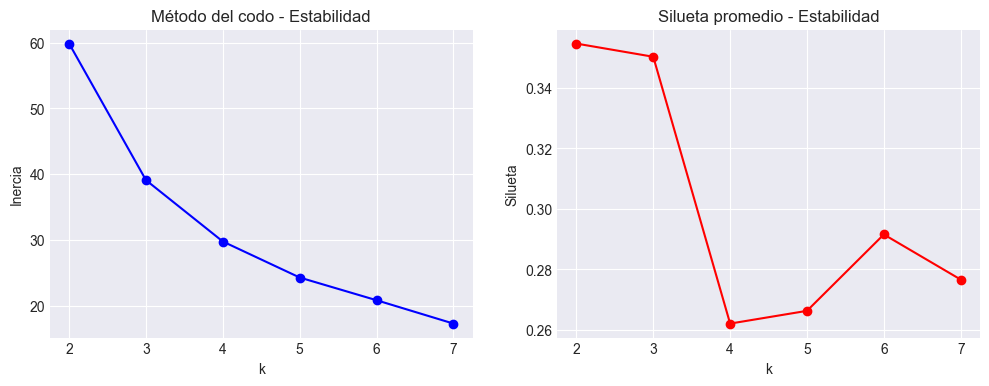

In [21]:
df_combinado = pd.read_csv('divorcios_matrimonios_combinado.csv', index_col=0)

# Selección de variables
vars_estabilidad = [
    'tasa_divorcios_por_matrimonio',
    'edad_hom_media_div',
    'edad_muj_media_div',
    'edad_hom_media_mat',
    'edad_muj_media_mat'
]

X_est = df_combinado[vars_estabilidad].copy()
# Escalar
scaler_est = StandardScaler()
X_est_scaled = scaler_est.fit_transform(X_est)

# Determinar k óptimo (2 a 8)
inertias = []
sil_scores = []
K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_est_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_est_scaled, km.labels_))

# Gráficos codo y silueta
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inercia')
plt.title('Método del codo - Estabilidad')
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silueta')
plt.title('Silueta promedio - Estabilidad')
plt.show()

In [22]:
# Elegir k que maximiza silueta
k_opt_est = K_range[np.argmax(sil_scores)]
print(f"k óptimo = {k_opt_est} (silueta = {max(sil_scores):.4f})")

# Aplicar K-means
km_est = KMeans(n_clusters=k_opt_est, random_state=42, n_init=10)
labels_est = km_est.fit_predict(X_est_scaled)
df_combinado['cluster_est'] = labels_est

# Validación con silueta
sil_prom_est = silhouette_score(X_est_scaled, labels_est)
print(f"Silueta promedio final: {sil_prom_est:.4f}")

# Perfil de clusters (medias de variables originales)
perfil_est = df_combinado.groupby('cluster_est')[vars_estabilidad].mean().round(2)
print("\nPerfil de clusters (medias):")
print(perfil_est)

# Distribución de departamentos
for c in range(k_opt_est):
    deptos = df_combinado[df_combinado['cluster_est'] == c].index.tolist()
    print(f"\nCluster {c}: {deptos}")

k óptimo = 2 (silueta = 0.3547)
Silueta promedio final: 0.3547

Perfil de clusters (medias):
             tasa_divorcios_por_matrimonio  edad_hom_media_div  \
cluster_est                                                      
0                                     0.09               35.57   
1                                     0.04               34.03   

             edad_muj_media_div  edad_hom_media_mat  edad_muj_media_mat  
cluster_est                                                              
0                         31.95               30.42               27.05  
1                         30.56               27.77               24.90  

Cluster 0: ['Chiquimula', 'El Progreso', 'Escuintla', 'Guatemala', 'Huehuetenango', 'Izabal', 'Jalapa', 'Jutiapa', 'Petén', 'Quetzaltenango', 'Sacatepéquez', 'San Marcos', 'Santa Rosa', 'Zacapa']

Cluster 1: ['Alta Verapaz', 'Baja Verapaz', 'Chimaltenango', 'Quiché', 'Retalhuleu', 'Sololá', 'Suchitepéquez', 'Totonicapán']


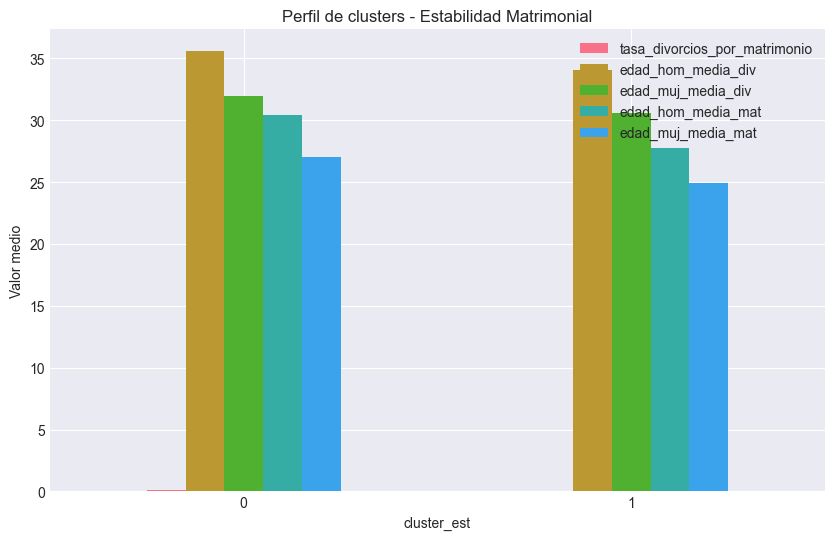

In [23]:
# Gráfico de barras comparativo
perfil_est.plot(kind='bar', figsize=(10,6))
plt.title('Perfil de clusters - Estabilidad Matrimonial')
plt.ylabel('Valor medio')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()